# Activité numérique : Mouvement circulaire

## 1. Utiliser un notebook

Dans ce TP, tu vas utiliser un _notebook_ Jupyter qui est un document « mixte », contenant du texte et du code Python. Ces lignes, que tu es en train de lire, font partie d'un _notebook_ .

Dans la suite de ce _notebook_ , on va donc utiliser du code Python. Pas d'inquiétude si tu ne comprends pas toutes les lignes de code. Tu ne vas devoir modifier que certaines lignes.
Un _notebook_ Jupyter te permet de de modifier et d'exécuter des scripts Python, directement dans le navigateur, sans aucune installation de ta part car ici le code Python est interprété sur une machine distante (un serveur distant).

En haut du _notebook_ , tu dois voir une barre, contenant&nbsp;:
* un titre pour le _notebook_ ;
* une barre de menus avec les entrées `File`, `Insert`, `Cell`, `Kernel`;
* et une barre de boutons qui sont des raccourcis vers certains menus fréquemment utilisés. Si tu laisses ta souris au dessus d'un bouton, un petit texte apparaît, indiquant à quelle fonction correspond ce bouton.

Un _notebook_ est constitué d'une suite de cellules, soit textuelles, soit contenant du code. Les cellules de code sont facilement reconnaissables, elles sont précédées de `Entrée [ ]:`. La cellule qui suit celle que tu es en train de lire est une cellule de code.

Pour commencer, sélectionne la cellule de code ci-dessous avec ta souris et appuie dans la barre de boutons sur celui en forme de flèche triangulaire vers la droite (Exécuter).

In [ ]:
20*30

Comme tu le vois, la cellule est « exécutée » (on dira plus volontiers « évaluée »), et on passe à la cellule suivante.

Alternativement tu peux simplement taper au clavier ***Shift+Enter***, ou, selon les claviers, ***Maj-Entrée***, pour obtenir le même effet (<kbd>SHIFT</kbd>+<kbd>ENTER</kbd> ou <kbd>MAJ</kbd>+<kbd>ENTRÉE</kbd>). D'une manière générale, il est important d'apprendre et d'utiliser les raccourcis clavier, cela te fera gagner beaucoup de temps par la suite.

La façon habituelle d'*exécuter* l'ensemble du notebook consiste à partir de la première cellule, et à taper  <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> (ou <kbd>MAJ</kbd>+<kbd>ENTRÉE</kbd>) jusqu'au bout du notebook, en n'allant pas trop vite, c'est-à-dire en attendant le résultat de l'exécution de chaque cellule.

Lorsqu'une cellule de code a été évaluée, Jupyter ajoute sous la cellule `Entrée` une cellule `Out` qui donne le résultat du fragment Python, soit ci-dessus 600.

Jupyter ajoute également un nombre entre les crochets pour afficher, par exemple ci-dessus, `Entrée [1]:`. Ce nombre te permet de retrouver l'ordre dans lequel les cellules ont été évaluées.

Tu peux naturellement modifier ces cellules de code pour faire des essais.

Tu peux également évaluer tout le notebook en une seule fois en utilisant le menu `Cell` -> `Run All`.

Si tu fais trop de modifications, ou si tu perds le fil de ce que tu as évalué, il peut être utile de redémarrer ton interpréteur. Le menu `Kernel` → `Restart` te permet de faire cela.


## 2. Travail demandé
Tu devras :
- lire ce _notebook_ et exécuter au fur et à mesure toutes les cellules de code (taper au clavier ***Shift+Enter***).
- analyser les résultats obtenus
- répondre aux questions en sélectionnnant avec ta souris la cellule textuelle située juste en dessous de la question afin de pouvoir y rédiger ta réponse.
- modifier certaines lignes du code quand cela te sera demandé.

## 3. Problématique
Lors de missions spatiales, les astronautes subissent de fortes accélérations, en particulier au décollage. Pour être en mesure de les supporter, ils ont été préalablement entraînés à l'aide de centrifugeuses. 
La centrifugeuse de la cité des étoiles en Russie a un bras rotatif de rayon R= 7,00 m.

![Centrifugeuse de la cité des étoiles](Images/Centrifugeuse.jpg)  

__Objectif :__
L'objectif de cette activité est d'exploiter une chronophotographie d'un mouvement circulaire, pour étudier l'accélération du système dans ce type de mouvement

__Capacités exigibles :__
- Représenter des vecteurs accélération d'un point lors d'un mouvement à l'aide d'un langage de programmation.  
- Exploiter les expressions des coordonnées des vecteurs vitesse et accélération dans le repère de Frenet dans le cas d'un mouvement circulaire.


In [5]:
# Importation des bibliothèques
import math as math
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook
import csv       # La bibliothèque csv permet l'importation de données 
                 # contenues dans des fichiers .csv (type tableur)

## 4. Positions de la cabine d'une centrifugeuse
Pour obtenir une accélération de 4 g ($g = 9,81\, m.s^{-2}$), la cabine d'une centrifugeuse est mise en rotation.  
On enregistre ses coordonnées toutes les $\Delta t =200 \,ms$.  
Le fichier *pointage_centrifugeuse.csv* obtenu lors du pointage vidéo contient un tableau de trois colonnes t, x et y. 

La vitesse de la cabine augmente pendant un demi-tour :  
lorsque $t\in \,[0\,s \,;\, 2,65\,s]$, $v(t) = kt$ avec $k = 6,26 \,m.s^{-2}$  
Puis elle est constante :  
lorsque $t\in \,\,]2,65\,s \,;\, +\infty]$, $v(t) = v_0$ avec $v_0 = 16,6 \,m.s^{-1}$  

La cellule suivante contient les lignes de code qui te permettront d'afficher ton tableau de données sous forme de listes (une liste par colonne du tableau).

In [6]:
with open("pointage_centrifugeuse.csv", "r", encoding="utf-8") as f:
    rfichier = csv.reader(f, delimiter=";")
    tableau=[]
    index_row=0
    N=1
    for row in rfichier:            
        if index_row < N:
             index_row = index_row+1
        else : 
              for i in range (len(row)): 
                if len(tableau) <= i:
                    X = []       
                    tableau.append(X) 
                try:
                    tableau[i].append(float(row[i].replace(",",'.')))    
                except ValueError:
                    print('erreur:contenu de cellule non numérique')
                    continue
    
    t=tableau[0]
    x=tableau[1]
    y=tableau[2]
    print("t : ",t)
    print("x : ",x)
    print("y : ",y)

t :  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8]
x :  [7.0, 6.998881099, 6.982104744, 6.90956205, 6.715502101, 6.312235615, 5.599248567, 4.480957653, 2.89565726, 0.855470396, -1.508498917, -3.91012293, -5.905091302, -6.949767109, -6.574937759, -4.753602016, -1.884093372, 1.400859311, 4.376921437, 6.38786902]
y :  [0.0, 0.125153331, 0.500213304, 1.121584717, 1.975356052, 3.025835677, 4.201001724, 5.37782656, 6.373003141, 6.947529806, 6.835527121, 5.806112182, 3.758975487, 0.83710043, -2.402122699, -5.138411026, -6.741675768, -6.858395818, -5.462834313, -2.86271364]


La cellule suivante permet de représenter les positions du centre de la cabine au cours du temps lors du premier tour, vues de dessus.

<IPython.core.display.Javascript object>


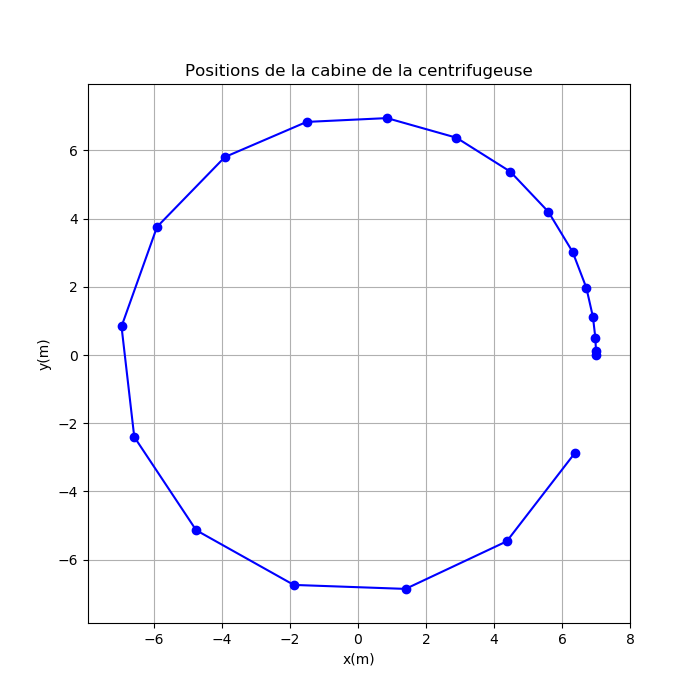

In [7]:
fig = plt.figure(figsize=(7,7))
plt.plot(x,y,'bo-')
plt.xlim(min(x)-1,max(x)+1)
plt.ylim(min(y)-1,max(y)+1)
plt.grid()
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.title("Positions de la cabine de la centrifugeuse")
plt.show()

__Question 1__ : Le graphique ci-dessus permet-il de reconnaître les deux phases du mouvement décrites précédemment ? Justifier.

..................

## 5. Calcul et représentation des vecteurs vitesse et accélération

La cellule suivante permet de calculer la coordonnée selon l'axe (Ox) $v_x$ du vecteur vitesse pour les différentes positions de la cabine.

In [ ]:
# Coordonnée vx du vecteur vitesse
vx=[]
for i in range (1,len(x)-1) :
    vxi=(x[i+1]-x[i-1])/(t[i+1]-t[i-1])
    vx.append(vxi)

__Question 2__ : Modifier les trois cellules suivantes afin de calculer la coordonnée $v_y$ du vecteur vitesse ainsi que les coordonnées $a_x$ et $a_y$ du vecteur accélération.

In [ ]:
# Coordonnée vy du vecteur vitesse
vy=[]
for i in range (1,len(y)-1) :
    vyi=0
    vy.append(vyi)

In [ ]:
# Coordonnée ax du vecteur accélération
ax=[]
for i in range (1,len(vx)-1) :
    axi=0
    ax.append(axi)

In [ ]:
# Coordonnée ay du vecteur accélération
ay=[]
for i in range (1,len(vy)-1) :
    ayi=0
    ay.append(ayi)

La cellule suivante permet de représenter les vecteurs vitesse et accélération de la cabine de la centrifugeuse.

In [ ]:
# Tracé des vecteurs vitesse et accélération
fig = plt.figure(figsize=(9,9))
plt.plot(x,y,'bo-')

for i in range (1, len (vy)+1):
    plt.arrow(x[i],y[i],0.10*vx[i-1],0.10*vy[i-1],head_width=0.1,
              length_includes_head=True)

for i in range (2, len (ay)+2):
    plt.arrow(x[i],y[i],0.10*ax[i-2],0.10*ay[i-2],head_width=0.1,
              length_includes_head=True,fc='r',ec='r')
    

plt.xlim(min(x)-1,max(x)+1)
plt.ylim(min(y)-1,max(y)+1)
plt.grid()
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.title("Vecteurs vitesse et accélération de la cabine de la centrifugeuse")
plt.show()

__Question 3__ : Sur la figure ci-dessus, en quelle couleur sont représentées les vecteurs vitesse et accélération ?

...

__Question 4__ : Pourquoi, dans la deuxième phase du mouvement, le vecteur accélération n'est-il pas nul alors que la vitesse est constante ?

...

## 6. Coordonnées du vecteur accélération dans le repère de Frenet

Les deux cellules suivantes permettent de calculer et de tracer les coordonnées $a_n$ et $a_t$ du vecteur accélération dans le repère de Frenet. Ces coordonnées sont calculées directement à partir des coordonnées $a_x$ et $a_y$ calculées précédemment.  
__Rappel sur le repère de Frenet :__
![Repère de Frenet](Images/Repere_Frenet.jpg)  


In [ ]:
# Calcul des coordonnées an et at du vecteur accélération dans le repère de Frenet
an=[]
at=[]
for i in range(len(ay)):
    ani=-(ax[i]*x[i+2]+ay[i]*y[i+2])/(math.sqrt(x[i+2]**2+y[i+2]**2))
    an.append(ani)
    ati=(ay[i]*x[i+2]-ax[i]*y[i+2])/(math.sqrt(x[i+2]**2+y[i+2]**2)) 
    at.append(ati)
ta=t[2:len(t)-2]

In [ ]:
# Tracé des coordonnées an et at en fonction du temps
fig = plt.figure()
plt.plot(ta,an,'bo-',label="$a_n$ expérimentale")
plt.legend()
plt.grid()
plt.xlim(0,max(t))
plt.ylim(0,max(an)+1)
plt.plot(ta,at,'rx-',label="$a_t$ expérimentale")
plt.legend()
plt.xlabel("temps (en s)")
plt.ylabel("Accélération (en m/s²)")
plt.title("Accélération dans le repère de Frenet")
plt.show()

__Question 5__ : La coordonnée $a_t$ est au départ positive. Justifier cette observation à partir de l'expression de l'accélération dans le repère de Frenet et de la connaissance de la nature du mouvement de la cabine.

...

__Question 6__ : Comment expliquer le fait que $a_t$ devienne nulle ensuite ?

...

__Question 7__ : L'accélération obtenue une fois la cabine lancée a-t-elle la valeur attendue, c'est à dire 4 g ? Justifier par un calcul.

...

## 7. Calcul des expressions théoriques des coordonnées du vecteur accélération dans le repère de Frenet  
__Question 8__ : A partir des expressions théoriques des coordonnées du vecteur accélération dans le repère de Frenet, modifier la cellule ci-dessous pour calculer ainsi les valeurs théoriques de $a_n$ et de $a_t$ notées respectivement $a_{n \,th}$ et $a_{t \,th}$. On distinguera les deux phases du mouvement.

In [ ]:
# Calcul des coordonnées théoriques an_th et at_th du vecteur accélération dans le repère de Frenet
R=7.00      # Distance en mètre entre le centre de la cabine et le centre de rotation
k=6.26      # k en m.s-2  v = k t   
v0=16.6     # v0 en m.s-1  valeur de la vitesse de la cabine pour t supérieur à 2,65 s

an_th=[]
at_th=[]
for i in range(0,len(t)): 
    if t[i]<=2.65 :
        an_thi=0
        an_th.append(an_thi)
        at_thi=0
        at_th.append(at_thi)
    else :
        an_thi=0
        an_th.append(an_thi)
        at_thi=0
        at_th.append(at_thi)
        

In [ ]:
# Tracé des coordonnées théoriques (an_th, at_th) et expérimentales (a_n, a_t) 
fig = plt.figure()
plt.plot(ta,an,'bo',label="$a_n$ expérimentale")
plt.legend()
plt.grid()
plt.plot(ta,at,'rx',label="$a_t$ expérimentale")
plt.legend()
plt.plot(t,an_th,'b-',label="$a_n$ théorique")
plt.legend()
plt.plot(t,at_th,'r-',label="$a_t$ théorique")
plt.legend()
plt.xlim(0,max(t))
plt.ylim(0,max(an_th)+1)

plt.xlabel("temps (en s)")
plt.ylabel("Accélération (en m/s²)")
plt.title("Accélération dans le repère de Frenet")
plt.show()

__Question 9__ : Le fichier *pointage_centrifugeuse\_2.csv* contient le pointage du même mouvement sur la même durée, mais obtenue avec $\Delta t = 100\, ms$.  
Modifier le programme pour qu'il utilise les données du fichier *pointage_centrifugeuse_2.csv* et exécuter entièrement tout le _notebook_ (utiliser le menu `Cell` -> `Run All`).  
Quelle influence cela a-t-il de travailler sur un fichier contenant davantage de points ?


....

__Enregistrer ce notebook au format html :__

Une fois que vous avez terminé de répondre aux questions, enregistez ce notebook au format html en utilisant le menu `File` -> `Download as` -> `HTML (.html)` et envoyez le moi par la messagerie Pronote. Le nom du fichier html doit contenir le noms de tous les élèves du groupe.
